In [2]:
import numpy as np
import requests

In [3]:
cities = ['Řevnice', 'Dobřichovice', '"Lety (Praha-západ)"', 'Černošice']  # obce U Berounky
people = [3570, 3722, 1563, 7331]  # počet obyvatel k lednu 2020

In [4]:
# download new source file
# it takes some time

r = requests.get('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/obce.csv')
with open('obec.csv', 'wb') as f:
    f.write(r.content)

In [5]:
first = True
with open('obec.csv', 'r', encoding='utf-8-sig') as f_in:
    lines = filter(lambda x: x[:4] == 'den,' or 'Černošice' in x, f_in)
    #data = genfromtxt(lines, delimiter=',')
    data = np.genfromtxt(lines,  dtype=None, delimiter=',', names = True, encoding='utf8')

In [6]:
fdata = {}
for c in cities:
    myfilter = np.asarray([c])
    fdata[c] = data[np.in1d(data['obec_nazev'], myfilter)]

In [14]:
%matplotlib inline
from pylab import *

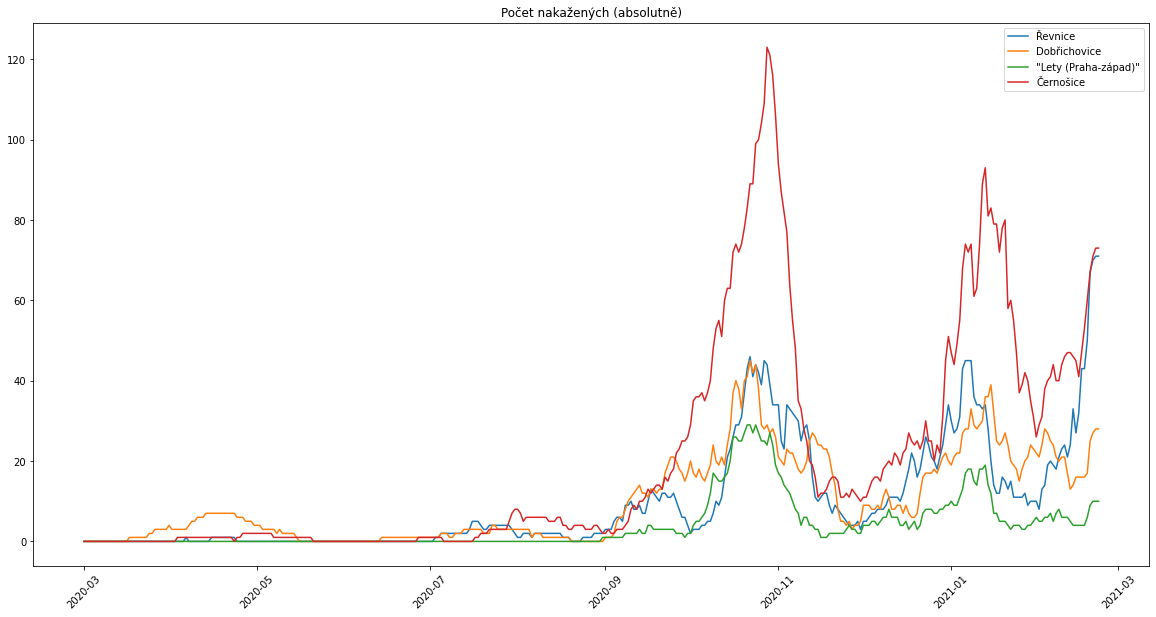

In [21]:
#nakazenych absolutne
figure(figsize=(20,10))
for c in cities:
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['aktivni_pripady'], label=c)  # 
legend()
title("Počet nakažených (absolutně)")
xticks(rotation=45)
show()

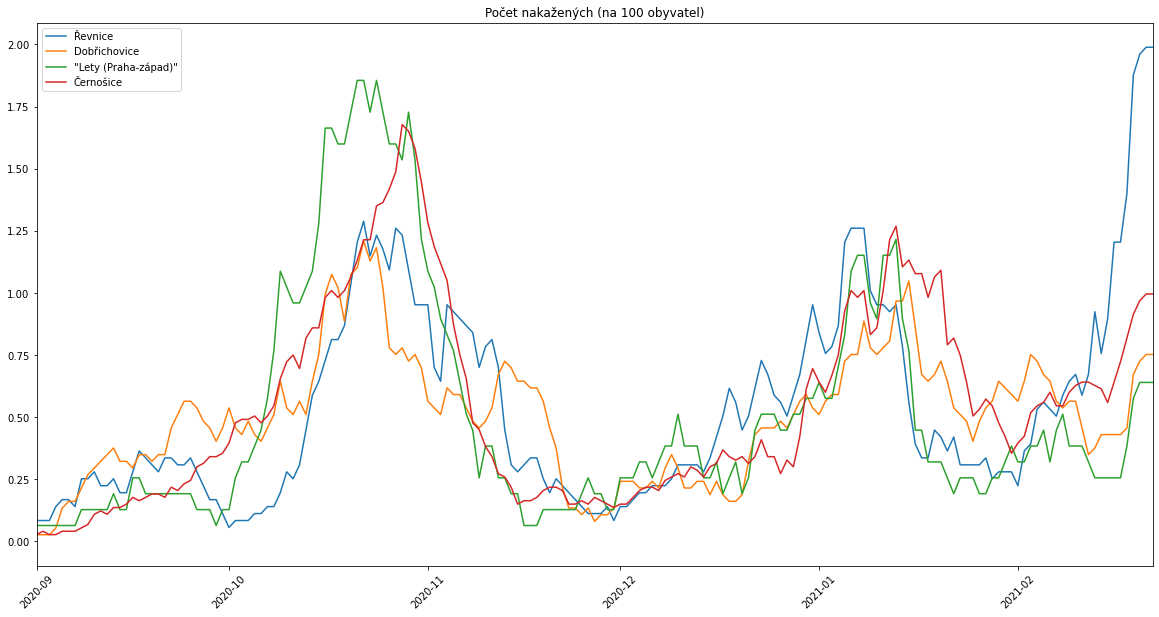

In [20]:
#nakazenych na 100 obyvatel
#%matplotlib widget
figure(figsize=(20,10))
for c, p in zip(cities,people):
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['aktivni_pripady'] / p * 100, label=c)  # 
legend()
title("Počet nakažených (na 100 obyvatel)")
xticks(rotation=45)
xlim(datetime.date(2020,9,1),datetime.date.today())
show()

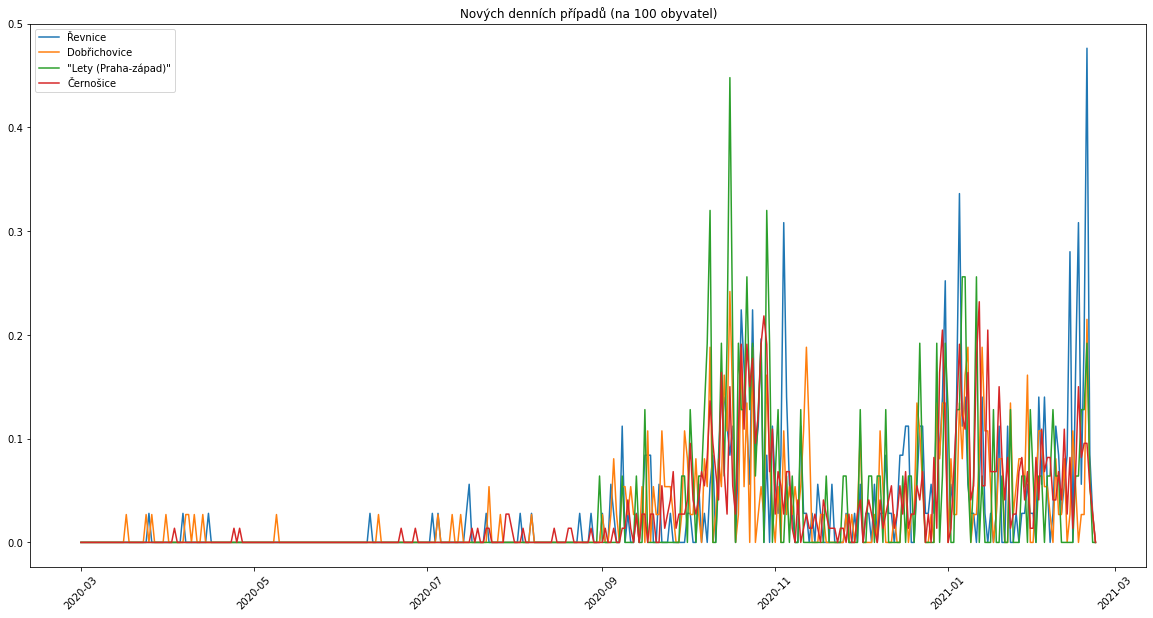

In [22]:
#nove pripady na 100 obyvatel
figure(figsize=(20,10))
for c, p in zip(cities,people):
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['nove_pripady'] / p * 100, label=c)
legend()
title("Nových denních případů (na 100 obyvatel)")
xticks(rotation=45)
show()